In [1]:
from keras.applications import VGG16,imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import Model
import numpy as np
from IPython.display import Image,display
import glob
import os


Using TensorFlow backend.


In [2]:
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [7]:
model = VGG16(weights='imagenet')

In [44]:
def predictLabel(file):
    image = load_img(file,target_size=inputShape)
    image = img_to_array(image)
    image = np.expand_dims(image,axis=0)

    image = preprocess(image)
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)
    display(Image(filename=file,width=inputShape[0],height=inputShape[1]))
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        # other way
        print(f'{i+1}. {label}: {prob*100:.2f}%')

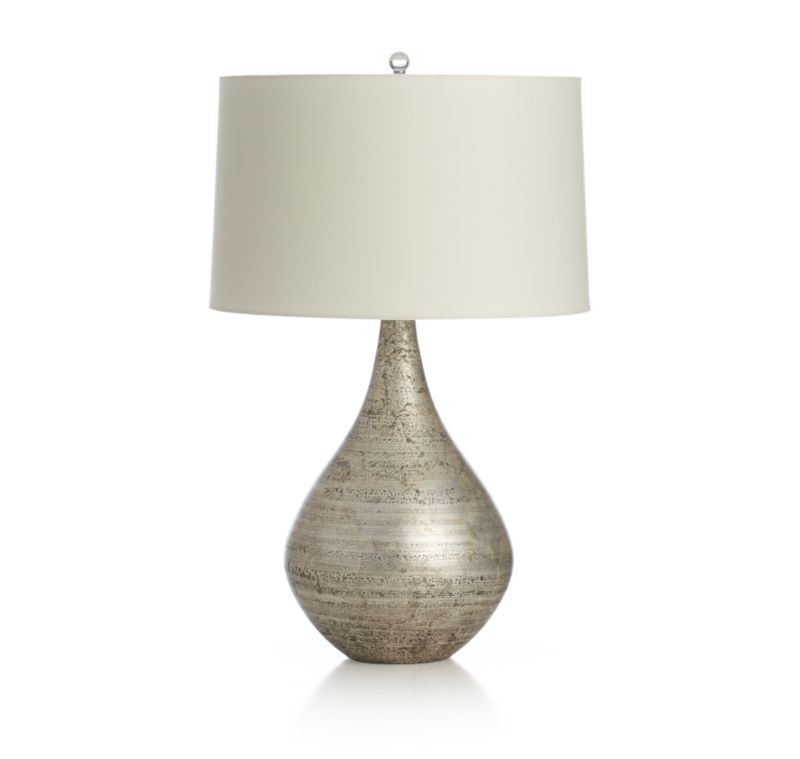

1. table_lamp: 75.61%
2. lampshade: 21.07%
3. spotlight: 0.60%
4. vase: 0.38%
5. hook: 0.17%


In [6]:
predictLabel('./images/lamp3.jpeg')

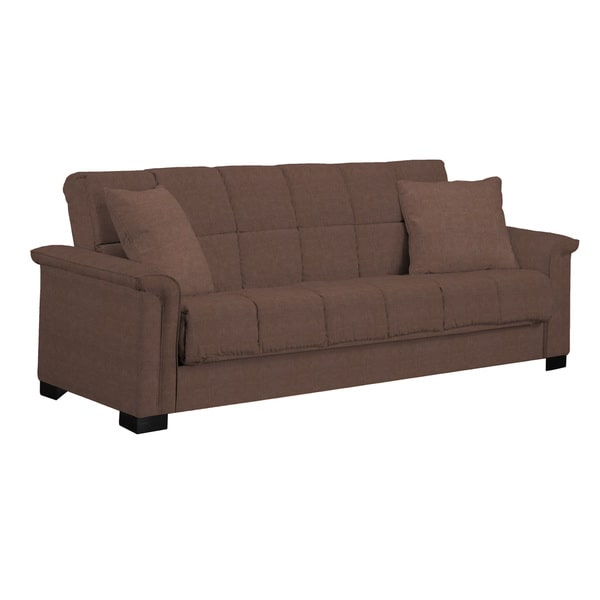

1. studio_couch: 99.57%
2. park_bench: 0.06%
3. pedestal: 0.06%
4. stretcher: 0.04%
5. cradle: 0.03%


In [9]:
predictLabel('./images/couch2.jpeg')

In [3]:
def get_features(model,file):
    image = load_img(file,target_size=inputShape)
    image = img_to_array(image)
    image = np.expand_dims(image,axis=0)

    image = preprocess(image)
    feature = feature_model.predict(image)
    return np.squeeze(feature)

In [4]:
def check_images(file):
    try:
        image = load_img(file,target_size=inputShape)
    except:
        print(f'Removing {file}')
        os.remove(file)

In [5]:
couch_images = glob.glob('./Data/OpenImages/couch/*.jpg')
for file in couch_images:
    check_images(file)
couch_images = glob.glob('./Data/OpenImages/couch/*.jpg')
print(f'{len(couch_images)} images available')

Removing ./Data/OpenImages/couch/11008179146_63010024d7_o.jpg
Removing ./Data/OpenImages/couch/113137019_cffc884e1e_o.jpg
Removing ./Data/OpenImages/couch/12462974684_27616520ea_o.jpg
Removing ./Data/OpenImages/couch/14715250382_5058efe303_o.jpg
Removing ./Data/OpenImages/couch/14766581670_5ff636829e_o.jpg
Removing ./Data/OpenImages/couch/14863688331_5e51fe480a_o.jpg
Removing ./Data/OpenImages/couch/15679717925_3452e6ce3e_o.jpg
Removing ./Data/OpenImages/couch/15786900266_17b5bf4c2e_o.jpg
Removing ./Data/OpenImages/couch/162382770_ae751d00fc_o.jpg
Removing ./Data/OpenImages/couch/16656565881_67d881b001_o.jpg
Removing ./Data/OpenImages/couch/16805048047_d38cc8df51_o.jpg
Removing ./Data/OpenImages/couch/2014071665_2cd8a99381_o.jpg
Removing ./Data/OpenImages/couch/2267352872_62a3b0a59f_o.jpg
Removing ./Data/OpenImages/couch/2476830065_4864f94879_o.jpg
Removing ./Data/OpenImages/couch/2711313389_97922786cb_o.jpg
Removing ./Data/OpenImages/couch/3223801304_50fe11a01b_o.jpg
Removing ./Data/O

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 36962304 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37486592 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin

Removing ./Data/OpenImages/couch/422069876_8a8f8b71a2_o.jpg
Removing ./Data/OpenImages/couch/4307596107_7f51875eff_o.jpg
Removing ./Data/OpenImages/couch/4339831505_8446793974_o.jpg
Removing ./Data/OpenImages/couch/4441307628_db3b61a60f_o.jpg
Removing ./Data/OpenImages/couch/4505460388_9dfa3d1e24_o.jpg
Removing ./Data/OpenImages/couch/4641505242_4b6155a48e_o.jpg
Removing ./Data/OpenImages/couch/4684813616_0580c81218_o.jpg
Removing ./Data/OpenImages/couch/4748434353_81e35f5467_o.jpg
Removing ./Data/OpenImages/couch/4749076488_562dc694ae_o.jpg
Removing ./Data/OpenImages/couch/4773013249_44e24340ec_o.jpg
Removing ./Data/OpenImages/couch/484536529_47a4d18940_o.jpg
Removing ./Data/OpenImages/couch/4858301553_1dc45e85f8_o.jpg
Removing ./Data/OpenImages/couch/5269198870_8f66eff4f4_o.jpg
Removing ./Data/OpenImages/couch/5302432955_240dcbc5aa_o.jpg
Removing ./Data/OpenImages/couch/5325312286_70b600f059_o.jpg
Removing ./Data/OpenImages/couch/5390706011_20e257dd0f_o.jpg
Removing ./Data/OpenImages

In [11]:
feature_model = Model(inputs=model.input,outputs=model.get_layer('fc1').output)

couch_feature_matrix = []

for file in couch_images:
    couch_feature_matrix.append(get_features(feature_model,file))

couch_feature_matrix = np.array(couch_feature_matrix)

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 36962304 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37486592 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin

In [12]:
def find_match(file,feature_matrix,image_list):
    img_feature = get_features(feature_model,file)
    L2 = np.sum((feature_matrix-img_feature)**2,axis=1)
    match = np.argmin(L2)

    print(f'distance: {np.sqrt(np.min(L2))}')
    display(Image(filename=file,width=inputShape[0],height=inputShape[1]))
    display(Image(filename=image_list[match],width=inputShape[0],height=inputShape[1]))

distance: 230.14195251464844


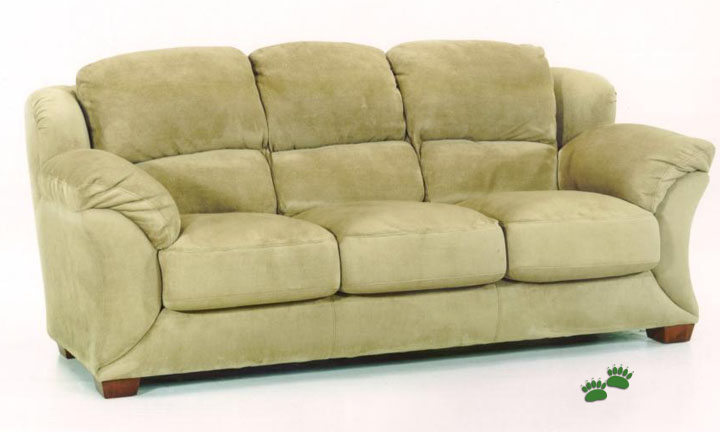

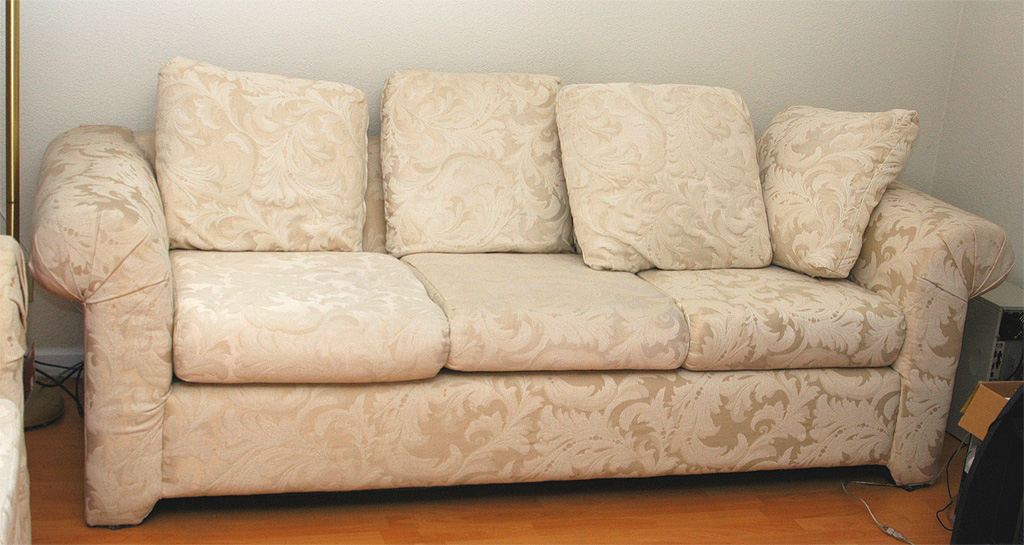

In [15]:
find_match('./images/couch1.jpeg',couch_feature_matrix,couch_images)

distance: 285.11767578125


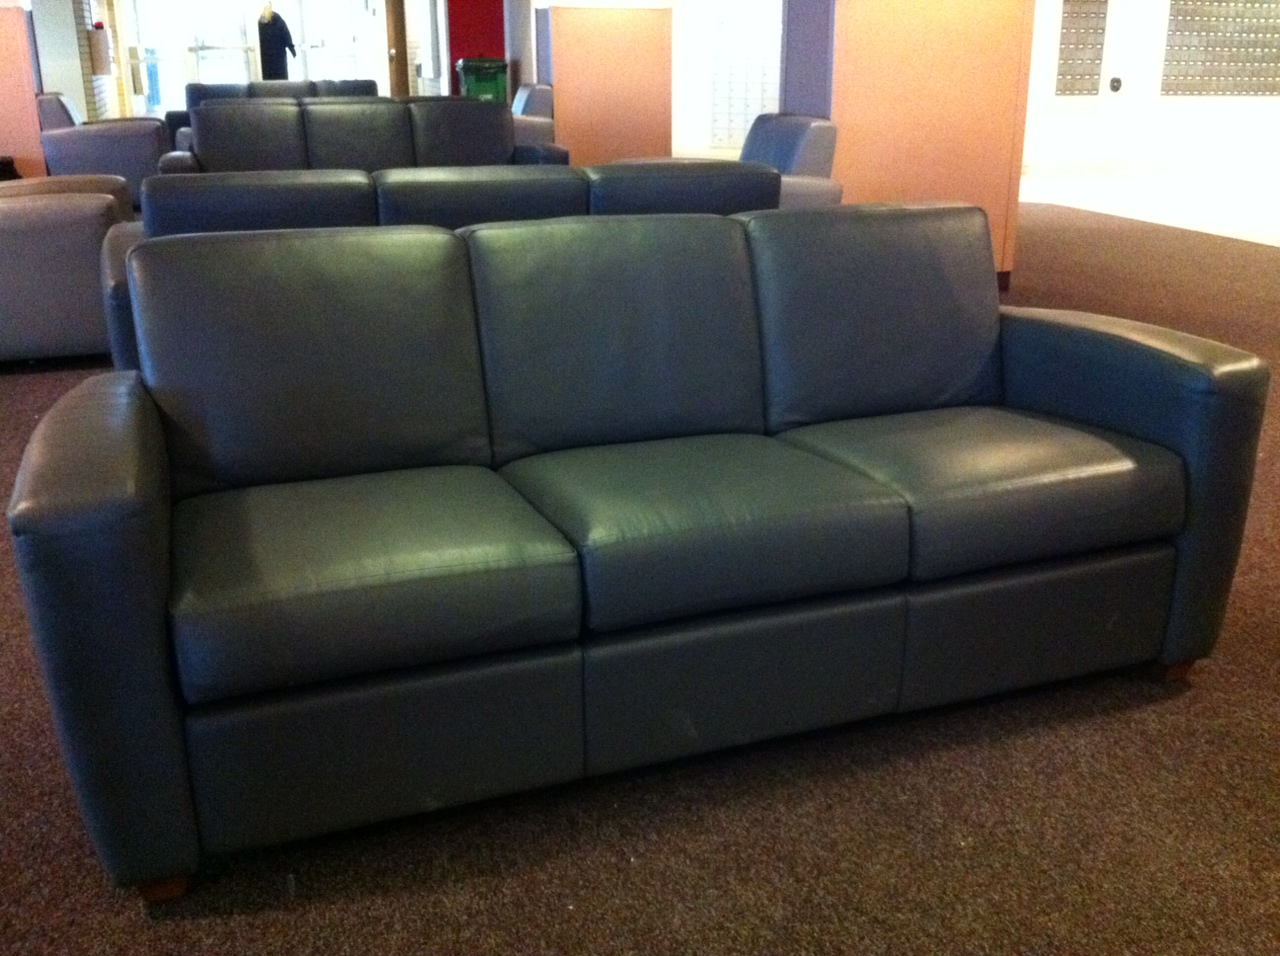

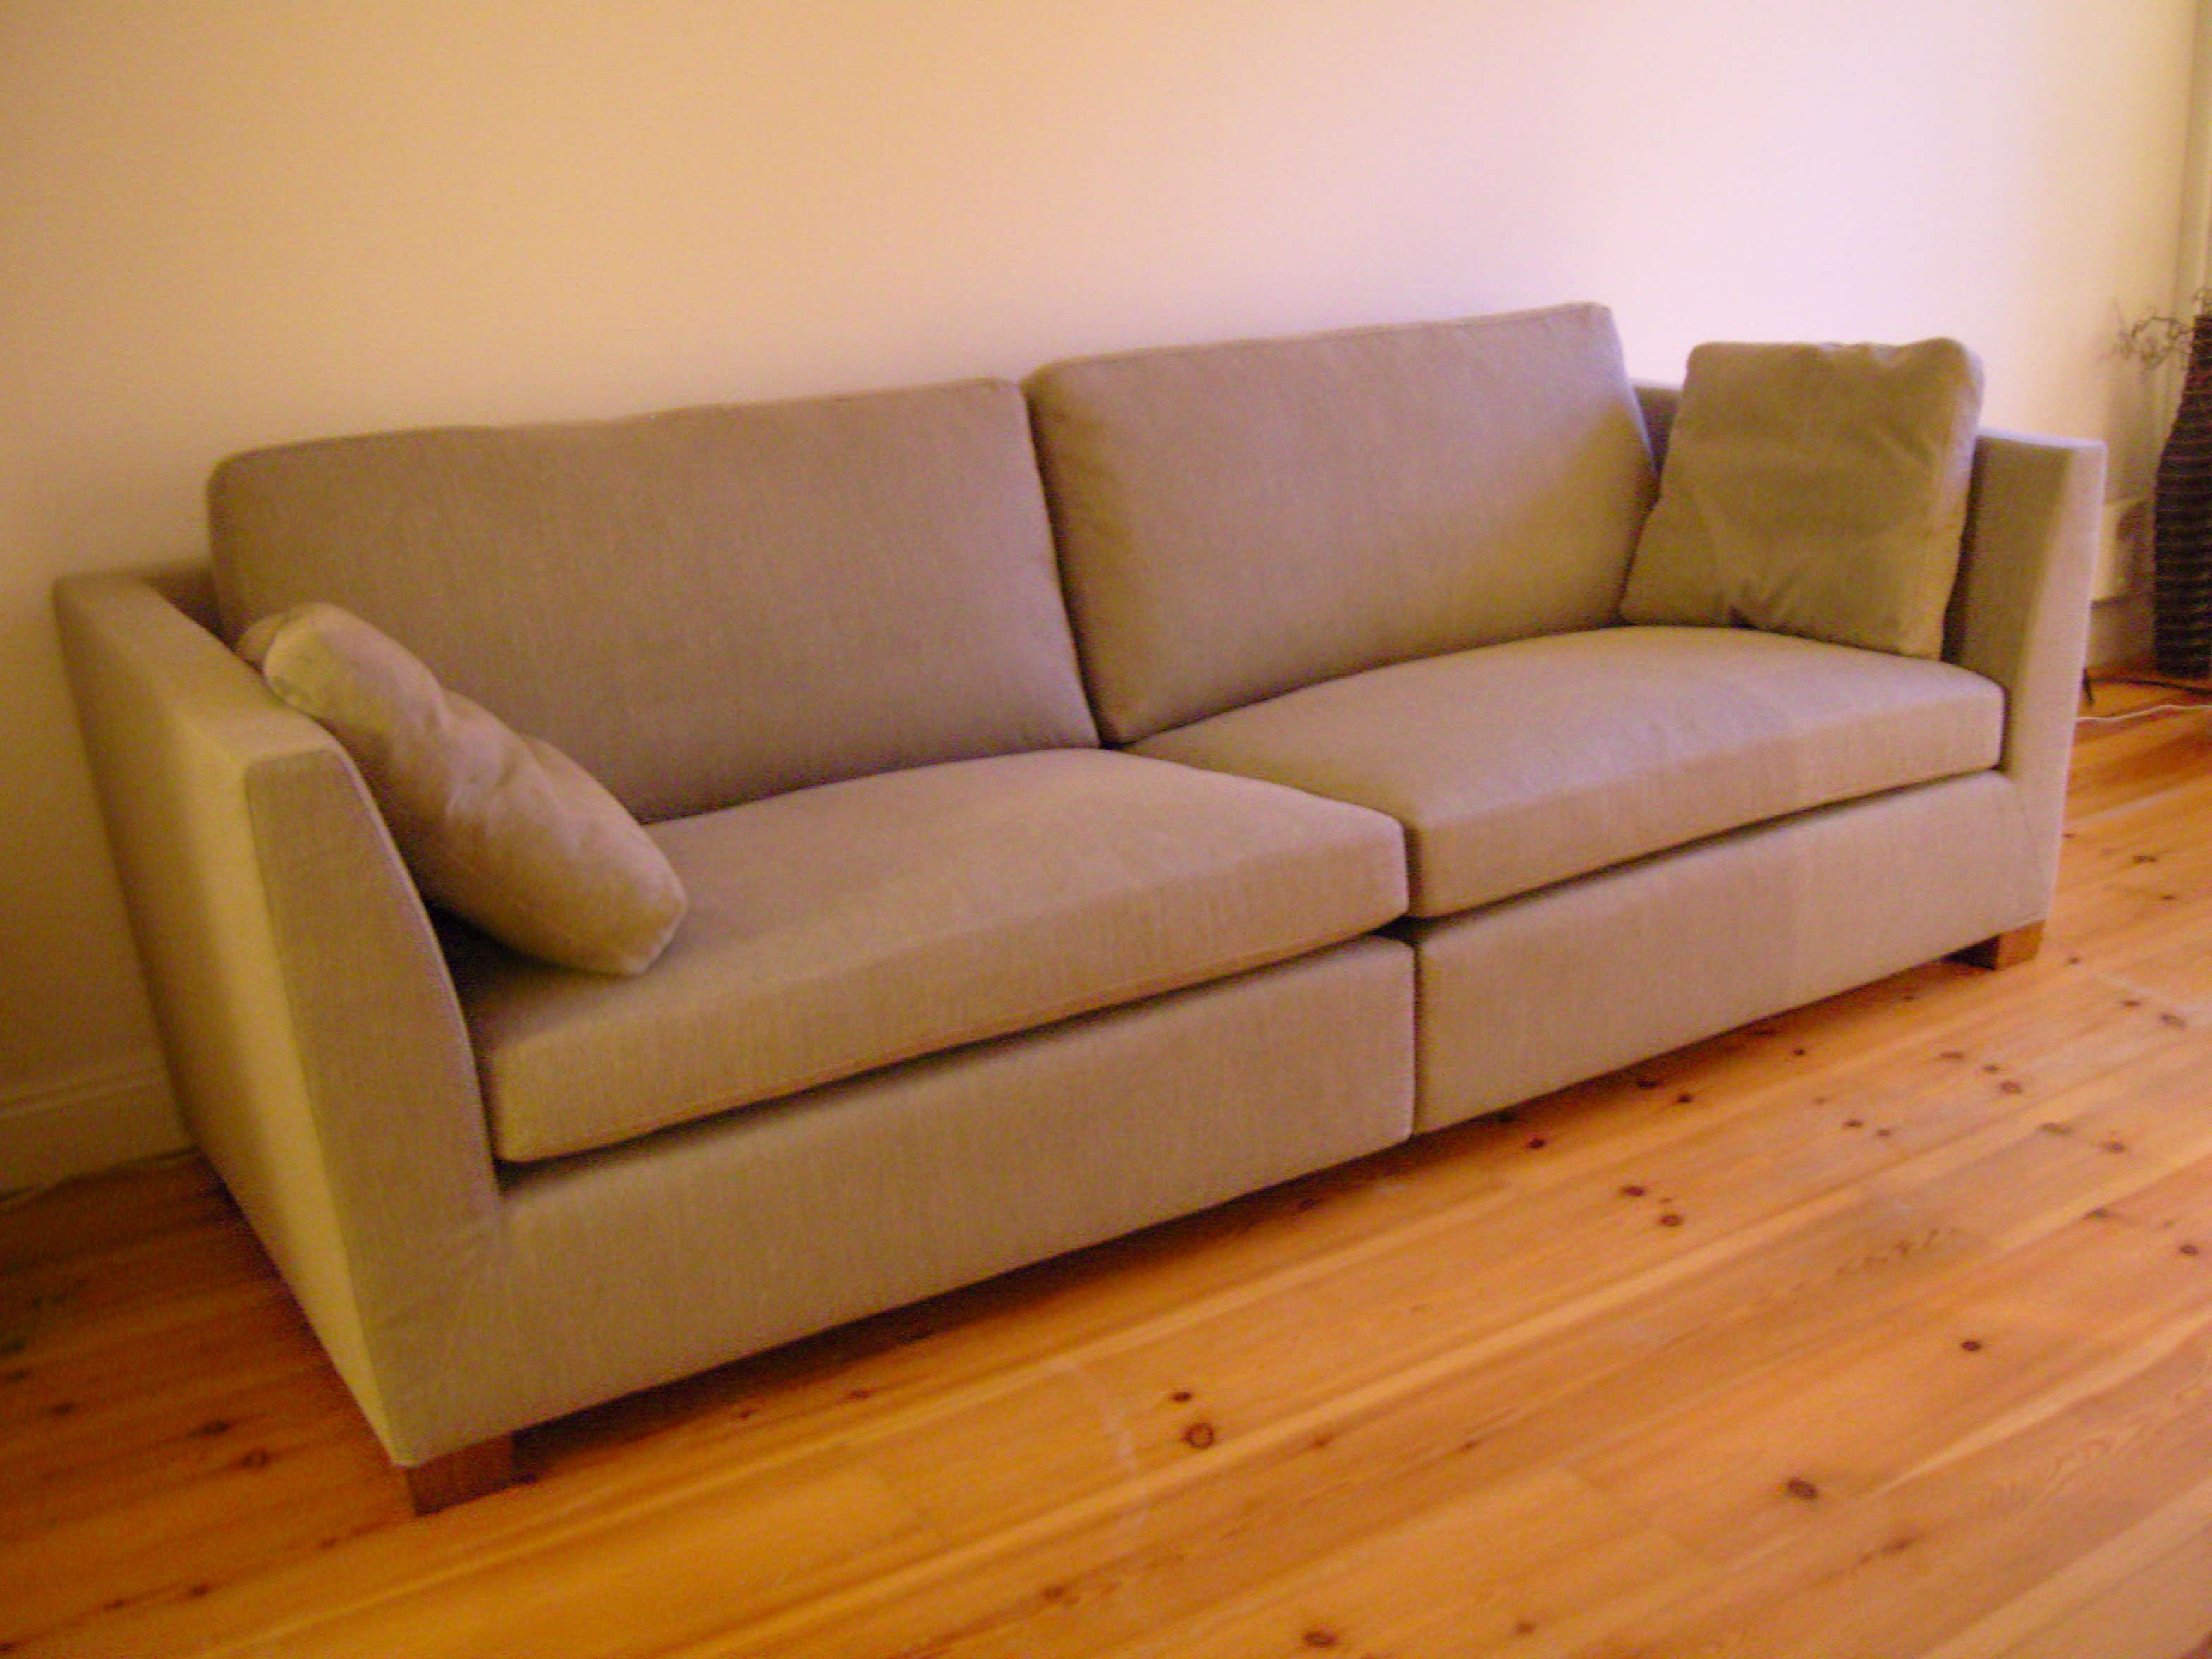

In [16]:
find_match('./images/couch4.jpeg',couch_feature_matrix,couch_images)

In [105]:
light_images = glob.glob('./Data/OpenImages/light_fixture/*.jpg')
for file in light_images:
    check_images(file)
light_images = glob.glob('./Data/OpenImages/light_fixture/*.jpg')
print(f'{len(light_images)} images available')

Removing ./Data/room_light_images/BREAKFAST_ROOM_LIGHT.thumb.jpg
Removing ./Data/room_light_images/estheticianroom.jpg
Removing ./Data/room_light_images/F1000031.jpg
Removing ./Data/room_light_images/g_room_dinsit.jpg
Removing ./Data/room_light_images/Garden_Room_sm.jpg
Removing ./Data/room_light_images/Gloucester_Livingroom_with_Lights.jpg
Removing ./Data/room_light_images/image10.jpg
Removing ./Data/room_light_images/lab-all-384px.jpg
Removing ./Data/room_light_images/light-dining-room-1.jpg
Removing ./Data/room_light_images/porter-LRlight.jpg
Removing ./Data/room_light_images/SOD-TheaterRoom.jpg
Removing ./Data/room_light_images/wakeuplight.jpg
Removing ./Data/room_light_images/Williamsburg room with candle light.jpg
588 images available


In [106]:
light_feature_matrix = []

for file in light_images:
    light_feature_matrix.append(get_features(feature_model,file))

light_feature_matrix = np.array(light_feature_matrix)

In [22]:
find_match('./images/light_chris.png',light_feature_matrix,light_images)

NameError: name 'light_images' is not defined

In [17]:
from sklearn.manifold import TSNE

In [18]:
model = TSNE()
embed = model.fit_transform(couch_feature_matrix)

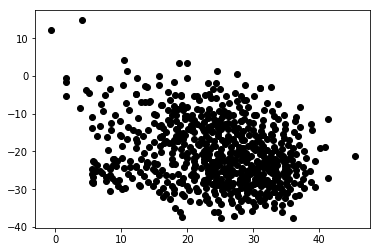

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(embed[:,0],embed[:,1],'ko')

In [55]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create figure
fig = plt.figure(figsize=(20,20),dpi=300)
ax = fig.add_subplot(111)

# Plots an image at each x and y location. 
def plotImage(x, y, image):
    im = OffsetImage(load_img(image,target_size=inputShape), zoom=0.15)
    ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
    ax.add_artist(ab)

for i in range(400):
    plotImage(embed[i,0],embed[i,1],couch_images[i])

ax.set_ylim(-40,0)
ax.set_xlim(0,40)

plt.savefig('output/couch_tsne.png')

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 36962304 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37486592 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin